In [1]:
import joblib

# Load model đã train
model = joblib.load("xgb_woa_best_model.pkl")
print(type(model))  # thường sẽ là xgboost.XGBRegressor hoặc XGBClassifier
scaler = joblib.load("scaler.pkl")
print(type(scaler))


<class 'xgboost.sklearn.XGBRegressor'>
<class 'sklearn.preprocessing._data.MinMaxScaler'>


c:\Users\LENOVO\anaconda3\lib\pickle.py:1718: UserWarning: [13:00:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\data\../common/error_msg.h:82: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  setstate(state)
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
from xgboost import XGBRegressor
from mealpy import FloatVar, WOA
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Đọc dữ liệu
data = pd.read_csv('Data1.csv')

# Chia thành input và output
input_data = data.iloc[:, :-1]
output_data = data.iloc[:, -1]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.15, random_state=37)

In [3]:
# Áp dụng scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


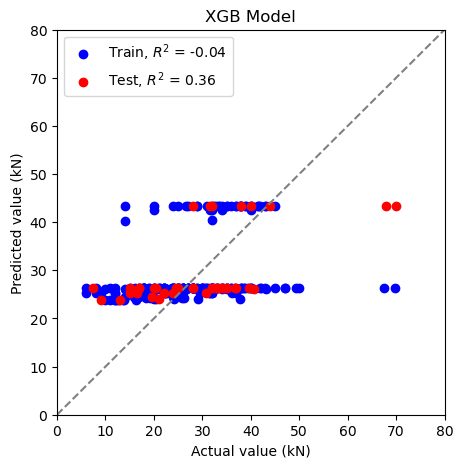

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.figure(figsize=(5,5))

# Vẽ đường chéo y=x
plt.plot([0,80],[0,80], color='grey', linestyle='--')

# Scatter train
plt.scatter(y_train, y_train_pred, 
            label=f"Train, $R^2$ = {r2_score(y_train, y_train_pred):.2f}",
            color='blue')

# Scatter test
plt.scatter(y_test, y_test_pred, 
            label=f"Test, $R^2$ = {r2_score(y_test, y_test_pred):.2f}",
            color='red')

plt.xlabel("Actual value (kN)")
plt.ylabel("Predicted value (kN)")
plt.xlim(0,80)
plt.ylim(0,80)
plt.legend()
plt.title("XGB Model")
plt.show()


c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


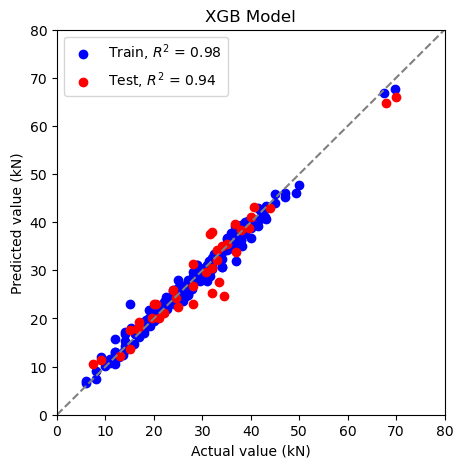

Train -> RMSE: 1.395, MAE: 0.988, R2: 0.981
Test  -> RMSE: 3.236, MAE: 2.494, R2: 0.938


In [106]:
import joblib
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load model và scaler
model = joblib.load("xgb_woa_best_model.pkl")
scaler = joblib.load("scaler.pkl")

# Đọc dữ liệu
data = pd.read_csv('Data1.csv')

# Chia thành input và output
input_data = data.iloc[:, :-1]
output_data = data.iloc[:, -1]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    input_data, output_data, test_size=0.15, random_state=37
)

# Scale dữ liệu bằng scaler đã lưu
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dự đoán (sử dụng dữ liệu đã scale)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)



# Vẽ biểu đồ
plt.figure(figsize=(5,5))
plt.plot([0,80],[0,80], color='grey', linestyle='--')

plt.scatter(y_train, y_train_pred, 
            label=f"Train, $R^2$ = {r2_score(y_train, y_train_pred):.2f}",
            color='blue')

plt.scatter(y_test, y_test_pred, 
            label=f"Test, $R^2$ = {r2_score(y_test, y_test_pred):.2f}",
            color='red')

plt.xlabel("Actual value (kN)")
plt.ylabel("Predicted value (kN)")
plt.xlim(0,80)
plt.ylim(0,80)
plt.legend()
plt.title("XGB Model")
plt.show()


# RMSE thủ công
rmse_train = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
rmse_test  = np.sqrt(np.mean((y_test  - y_test_pred)  ** 2))

# MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test  = mean_absolute_error(y_test, y_test_pred)

print(f"Train -> RMSE: {rmse_train:.3f}, MAE: {mae_train:.3f}, R2: {r2_score(y_train, y_train_pred):.3f}")
print(f"Test  -> RMSE: {rmse_test:.3f}, MAE: {mae_test:.3f}, R2: {r2_score(y_test, y_test_pred):.3f}")


In [ ]:
import joblib
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load model và scaler
model = joblib.load("xgb_woa_best_model.pkl")
scaler = joblib.load("scaler.pkl")

# Đọc dữ liệu
data = pd.read_csv('Data1.csv')

# Chia thành input và output
input_data = data.iloc[:, :-1]
output_data = data.iloc[:, -1]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    input_data, output_data, test_size=0.15, random_state=37
)

# Scale dữ liệu bằng scaler đã lưu
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dự đoán (sử dụng dữ liệu đã scale)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Vẽ biểu đồ
plt.figure(figsize=(5,5))
plt.plot([0,80],[0,80], color='grey', linestyle='--')

plt.scatter(y_train, y_train_pred, 
            label=f"Train, $R^2$ = {r2_score(y_train, y_train_pred):.2f}",
            color='blue')

plt.scatter(y_test, y_test_pred, 
            label=f"Test, $R^2$ = {r2_score(y_test, y_test_pred):.2f}",
            color='red')

plt.xlabel("Actual value (kN)")
plt.ylabel("Predicted value (kN)")
plt.xlim(0,80)
plt.ylim(0,80)
plt.legend()
plt.title("XGB Model")
plt.show()


Train -> RMSE: 2.087, MAE: 1.428, R2: 0.957
Test  -> RMSE: 5.036, MAE: 3.657, R2: 0.849


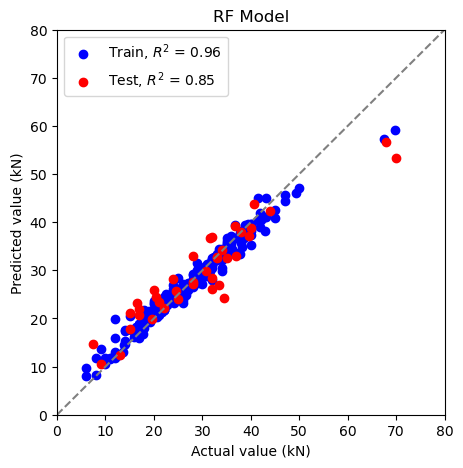

In [102]:
import joblib
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load model
model = RandomForestRegressor()



# Đọc dữ liệu
data = pd.read_csv('Data1.csv')

# Chia thành input và output
input_data = data.iloc[:, :-1]
output_data = data.iloc[:, -1]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    input_data, output_data, test_size=0.15, random_state=37
)

# Huấn luyện
model.fit(X_train, y_train)

# Dự đoán
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# ==== ĐÁNH GIÁ KẾT QUẢ ====
# RMSE thủ công
rmse_train = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
rmse_test  = np.sqrt(np.mean((y_test  - y_test_pred)  ** 2))

# MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test  = mean_absolute_error(y_test, y_test_pred)

# R²
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)


print(f"Train -> RMSE: {rmse_train:.3f}, MAE: {mae_train:.3f}, R2: {r2_train:.3f}")
print(f"Test  -> RMSE: {rmse_test:.3f}, MAE: {mae_test:.3f}, R2: {r2_test:.3f}")

# ==== VẼ BIỂU ĐỒ ====
plt.figure(figsize=(5,5))
plt.plot([0,80],[0,80], color='grey', linestyle='--')

plt.scatter(y_train, y_train_pred, 
            label=f"Train, $R^2$ = {r2_train:.2f}",
            color='blue')

plt.scatter(y_test, y_test_pred, 
            label=f"Test, $R^2$ = {r2_test:.2f}",
            color='red')

plt.xlabel("Actual value (kN)")
plt.ylabel("Predicted value (kN)")
plt.xlim(0,80)
plt.ylim(0,80)
plt.legend()
plt.title("RF Model")
plt.show()


2025/09/20 03:05:38 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: OriginalZOA(epoch=20, pop_size=15)
2025/09/20 03:05:50 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >>>Problem: P, Epoch: 1, Current best: 0.697, Global best: 0.697, Runtime: 7.58961 seconds
2025/09/20 03:06:00 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >>>Problem: P, Epoch: 2, Current best: 0.697, Global best: 0.697, Runtime: 9.84359 seconds
2025/09/20 03:06:05 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >>>Problem: P, Epoch: 3, Current best: 0.6991, Global best: 0.6991, Runtime: 5.59114 seconds
2025/09/20 03:06:17 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >>>Problem: P, Epoch: 4, Current best: 0.7061, Global best: 0.7061, Runtime: 11.69929 seconds
2025/09/20 03:06:25 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >>>Problem: P, Epoch: 5, Current best: 0.7061, Global best: 0.7061, Runtime: 8.25370 seconds
2025/09/20 03:06:32 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >>>Problem: P, Epoch: 6, Current best: 0.

Train:
RMSE: 1.534205670633195 MAE: 1.0628621791699613 R2: 0.976922793968461
Test:
RMSE: 3.6472759415516856 MAE: 2.9184116070087143 R2: 0.9208723869945821


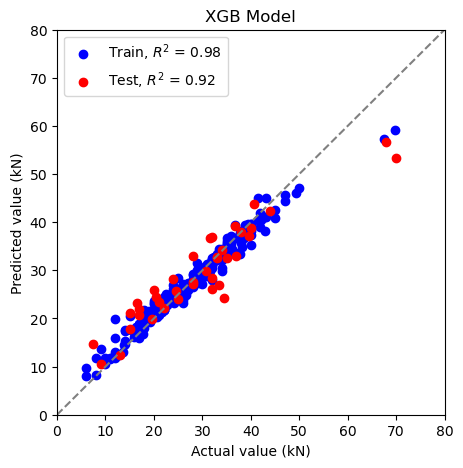

In [103]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from mealpy import FloatVar, ZOA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Đọc dữ liệu
data = pd.read_csv('Data1.csv')

# Input / Output
input_data = data.iloc[:, :-1]
output_data = data.iloc[:, -1]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    input_data, output_data, test_size=0.15, random_state=37
)

# Normalize
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
joblib.dump(scaler, 'scaler')
X_test = scaler.transform(X_test)

# Hàm mục tiêu
def objective_func(x):
    n_estimators = int(x[0])
    learning_rate = x[1]
    max_depth = int(x[2])

    model = XGBRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42
    )

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    return round(cv_scores.mean(), 4)

# Giới hạn siêu tham số: n_estimators, learning_rate, max_depth
lb = [50, 0.01, 1]
ub = [200, 0.3, 10]

problem_dict = {
    "obj_func": objective_func,
    "bounds": FloatVar(lb=lb, ub=ub),
    "minmax": "max",
    "save_population": True
}

term_dict = {"max_early_stop": 10}

optimizer = ZOA.OriginalZOA(epoch=20, pop_size=15)
optimizer.solve(problem_dict, termination=term_dict)

# Cài đặt mô hình tối ưu
optimal_model = XGBRegressor(
    n_estimators=int(optimizer.g_best.solution[0]),
    learning_rate=optimizer.g_best.solution[1],
    max_depth=int(optimizer.g_best.solution[2]),
    random_state=42
)
optimal_model.fit(X_train, y_train)

# Lưu model
joblib.dump(optimal_model, 'optimal_model_gbt_zoa')

# Đánh giá
y_pred_train = optimal_model.predict(X_train)
y_pred_test = optimal_model.predict(X_test)

rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Train:")
print("RMSE:", rmse_train, "MAE:", mae_train, "R2:", r2_train)
print("Test:")
print("RMSE:", rmse_test, "MAE:", mae_test, "R2:", r2_test)

# Lưu kết quả tối ưu
best_solution = np.array(optimizer.g_best.solution)
np.savetxt('best_solution_gbt_zoa.csv', best_solution, delimiter=',')

# Lưu dự đoán train
df_train = pd.DataFrame(scaler.inverse_transform(X_train), columns=input_data.columns)
df_train['y_train'] = y_train.values
df_train['y_pred_train'] = y_pred_train
df_train.to_csv('train_results_gbt_zoa.csv', index=False)

# Lưu dự đoán test
df_test = pd.DataFrame(scaler.inverse_transform(X_test), columns=input_data.columns)
df_test['y_test'] = y_test.values
df_test['y_pred_test'] = y_pred_test
df_test.to_csv('test_results_gbt_zoa.csv', index=False)


# Vẽ biểu đồ
plt.figure(figsize=(5,5))
plt.plot([0,80],[0,80], color='grey', linestyle='--')

plt.scatter(y_train, y_train_pred, 
            label=f"Train, $R^2$ = {r2_score(y_train, y_pred_train):.2f}",
            color='blue')

plt.scatter(y_test, y_test_pred, 
            label=f"Test, $R^2$ = {r2_score(y_test, y_pred_test):.2f}",
            color='red')

plt.xlabel("Actual value (kN)")
plt.ylabel("Predicted value (kN)")
plt.xlim(0,80)
plt.ylim(0,80)
plt.legend()
plt.title("XGB Model")
plt.show()



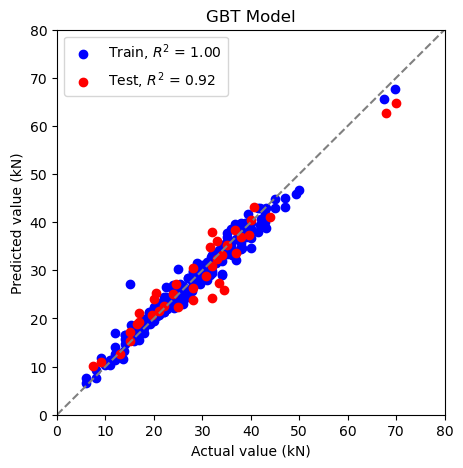

In [29]:
# Vẽ biểu đồ
plt.figure(figsize=(5,5))
plt.plot([0,80],[0,80], color='grey', linestyle='--')

plt.scatter(y_train, y_train_pred, 
            label=f"Train, $R^2$ = {r2_score(y_train, y_pred_train):.2f}",
            color='blue')

plt.scatter(y_test, y_test_pred, 
            label=f"Test, $R^2$ = {r2_score(y_test, y_pred_test):.2f}",
            color='red')

plt.xlabel("Actual value (kN)")
plt.ylabel("Predicted value (kN)")
plt.xlim(0,80)
plt.ylim(0,80)
plt.legend()
plt.title("GBT Model")
plt.show()


In [23]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ==============================
# 1. Load dữ liệu
# ==============================
data = pd.read_csv("Data1.csv")

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=37
)

# ==============================
# 2. Khởi tạo 3 mô hình (dùng tham số mặc định)
# ==============================
models = {
    "XGB": XGBRegressor(),
    "GBT": GradientBoostingRegressor(),
    "RF": RandomForestRegressor()
}

# ==============================
# 3. Hàm đánh giá mô hình
# ==============================
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results = {
        "Model": name,
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train R2": r2_score(y_train, y_train_pred),
        "Test R2": r2_score(y_test, y_test_pred)
    }
    return results

# ==============================
# 4. Chạy và in kết quả
# ==============================
all_results = []

for name, model in models.items():
    res = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    all_results.append(res)

results_df = pd.DataFrame(all_results)
print(results_df)


  Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R2   Test R2
0   XGB    0.084040   3.603985   0.022763  2.559021  0.999931  0.922740
1   GBT    1.967431   3.400991   1.447794  2.727778  0.962050  0.931198
2    RF    2.209413   5.435426   1.446257  3.824598  0.952140  0.824265
